In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium as flm
import shapely as shp
from shapely import wkt

In [2]:
df = pd.read_csv('../csv/communes-avec-coords-polygons-population-voisins-aa.csv')
df.head()

/tmp/ipykernel_346241/3622861136.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/communes-avec-coords-polygons-population-voisins-aa.csv')


,codgeo,codpost,nom,longitude,latitude,geometry,polygon,libgeo,p21_pop,p20_pop,population,nb_voisins,liste_voisins,name,codgeo_aa,aa_name,aa_cat
0,1001,1400,L ABERGEMENT CLEMENCIAT,4.930600,46.151702,POINT (4.9306005 46.1517018),"POLYGON ((4.904571 46.160961, 4.913322 46.1829...",L' Abergement-Clémenciat,832.0,806.0,832.0,6.0,"['01412', '01093', '01028', '01146', '01351', ...",L'Abergement-Clémenciat,524,Châtillon-sur-Chalaronne,20.0
1,1002,1640,L ABERGEMENT DE VAREY,5.424644,46.007131,POINT (5.4246442 46.007131),"POLYGON ((5.424759 46.031308, 5.441286 46.0254...",L' Abergement-de-Varey,267.0,262.0,267.0,6.0,"['01056', '01277', '01384', '01007', '01363', ...",L'Abergement-de-Varey,0,Commune hors attraction des villes,30.0
2,1004,1500,AMBERIEU EN BUGEY,5.370568,45.957471,POINT (5.37056825 45.9574707),"POLYGON ((5.386191 45.930928, 5.357241 45.9486...",Ambérieu-en-Bugey,14854.0,14288.0,14854.0,7.0,"['01384', '01421', '01041', '01345', '01089', ...",Ambérieu-en-Bugey,243,Ambérieu-en-Bugey,11.0
3,1005,1330,AMBERIEUX EN DOMBES,4.911872,45.999229,POINT (4.9118718 45.99922935),"POLYGON ((4.942867 45.979142, 4.92773 45.98003...",Ambérieux-en-Dombes,1897.0,1782.0,1897.0,7.0,"['01382', '01207', '01261', '01362', '01318', ...",Ambérieux-en-Dombes,2,Lyon,20.0
4,1006,1300,AMBLEON,5.592785,45.748314,POINT (5.5927847 45.74831435),"POLYGON ((5.570824 45.753383, 5.584292 45.7625...",Ambléon,113.0,113.0,113.0,6.0,"['01358', '01110', '01117', '01216', '01233', ...",Ambléon,286,Belley,20.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38236 entries, 0 to 38235
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   codgeo         38236 non-null  int64  
 1   codpost        38236 non-null  int64  
 2   nom            38236 non-null  object 
 3   longitude      38236 non-null  float64
 4   latitude       38236 non-null  float64
 5   geometry       38236 non-null  object 
 6   polygon        38142 non-null  object 
 7   libgeo         38235 non-null  object 
 8   p21_pop        38235 non-null  float64
 9   p20_pop        38232 non-null  float64
 10  population     38235 non-null  float64
 11  nb_voisins     38164 non-null  float64
 12  liste_voisins  38164 non-null  object 
 13  name           38179 non-null  object 
 14  codgeo_aa      38179 non-null  object 
 15  aa_name        38179 non-null  object 
 16  aa_cat         38179 non-null  float64
dtypes: float64(7), int64(2), object(8)
memory usage: 5

In [4]:
df = df.dropna(subset=['polygon'])
df['polygon'] = df['polygon'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df)
gdf.set_geometry('polygon', inplace=True)

<Axes: >

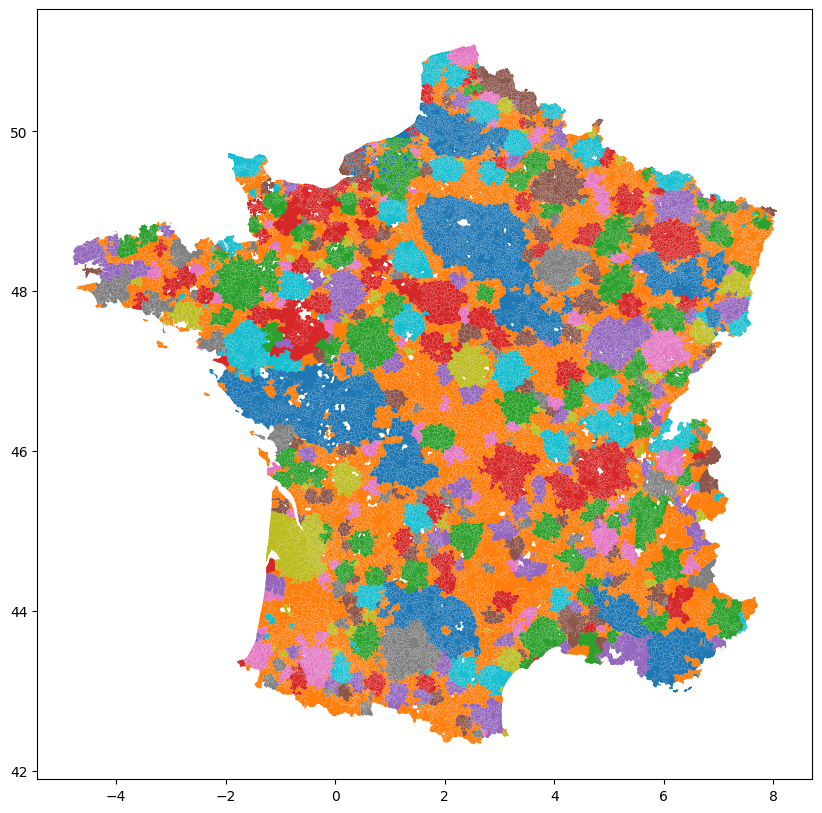

In [5]:
gdf.plot(column='codgeo_aa', figsize=(10,10), aspect=None)

In [6]:
gdf_aa = gdf[gdf.codgeo_aa != '0'].dissolve(by=['codgeo_aa', 'aa_name'], aggfunc='sum')

In [7]:
gdf_aa.value_counts('codgeo_aa').sort_values().head(20)

codgeo_aa
102    1
105    1
87     1
88     1
89     1
90     1
91     1
93     1
94     1
96     1
97     1
BAL    1
CHA    1
GEN    1
LAU    1
LUX    1
85     1
86     1
39     1
35     1
Name: count, dtype: int64

In [8]:
gdf_aa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 734 entries, (0, 'Commune hors attraction des villes') to ('SAR', 'Sarrebruck (partie française)')
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   polygon        734 non-null    geometry
 1   codgeo         734 non-null    int64   
 2   codpost        734 non-null    int64   
 3   nom            734 non-null    object  
 4   longitude      734 non-null    float64 
 5   latitude       734 non-null    float64 
 6   geometry       734 non-null    object  
 7   libgeo         734 non-null    object  
 8   p21_pop        734 non-null    float64 
 9   p20_pop        734 non-null    float64 
 10  population     734 non-null    float64 
 11  nb_voisins     734 non-null    float64 
 12  liste_voisins  734 non-null    object  
 13  name           734 non-null    object  
 14  aa_cat         734 non-null    float64 
dtypes: float64(7), geometry(1), int64(2), ob

<Axes: >

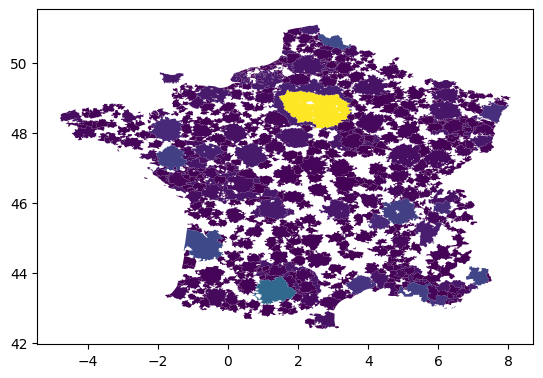

In [9]:
gdf_aa.plot('population', cmap='viridis')

In [13]:
gdf_aa.head(5)

,,polygon,codgeo,codpost,nom,longitude,latitude,geometry,libgeo,p21_pop,p20_pop,population,nb_voisins,liste_voisins,name,aa_cat
codgeo_aa,aa_name,,,,,,,,,,,,,,,
0,Commune hors attraction des villes,"MULTIPOLYGON (((-0.33583 46.13645, -0.30698 46...",83783476,83879261,ST MAURICE D ETELANST MICHEL D HALESCOURTST OU...,2412.442136,46930.952659,POINT (0.6307842 49.460607100000004)POINT (1.6...,Saint-Maurice-d'ÉtelanSaint-Michel-d'Halescour...,691320.0,690554.0,691320.0,6210.0,"['76471', '76727', '27006', '27686', '76499', ...",Saint-Maurice-d'ÉtelanSaint-Michel-d'Halescour...,30000.0
1,Paris,"POLYGON ((1.60757 48.65962, 1.60271 48.6631, 1...",115161818,115401670,ACHERES LA FORETAMILLISAMPONVILLEANDREZELANNET...,3353.378837,66992.128591,POINT (2.5652663 48.34755395)POINT (3.1400218 ...,Achères-la-ForêtAmillisAmponvilleAndrezelAnnet...,11726607.0,11660267.0,11726607.0,8388.0,"['77186', '77477', '77088', '77485', '77339'][...",Achères-la-ForêtAmillisAmponvilleAndrezelAnnet...,24524.0
3,Marseille - Aix-en-Provence,"MULTIPOLYGON (((5.68674 43.17968, 5.67188 43.1...",3253304,3195894,ARTIGUESBRASBRUE AURIACLA CADIERE D AZURLA CAD...,222.584090,1696.887849,POINT (5.79997205 43.58023555)POINT (5.9558458...,ArtiguesBrasBrue-AuriacLa Cadière-d'AzurLa Cad...,163537.0,162918.0,163537.0,234.0,"['83066', '83052', '83089', '83097', '83104'][...",ArtiguesBrasBrue-AuriacLa Cadière-d'AzurLa Cad...,780.0
5,Toulouse,"MULTIPOLYGON (((1.15779 43.81838, 1.1446 43.82...",5951524,5977320,AGUTSALGANSAMBRESBANNIERESBEAUVAIS SUR TESCOUB...,114.624739,3195.378114,POINT (1.92714495 43.53325205)POINT (1.8915381...,AgutsAlgansAmbresBannièresBeauvais-sur-TescouB...,92246.0,91528.0,92246.0,431.0,"['81205', '81219', '81179', '81214', '81189', ...",AgutsAlgansAmbresBannièresBeauvais-sur-TescouB...,1460.0
8,Nantes,"POLYGON ((-1.54296 46.96165, -1.55436 46.97816...",85262,85660,ST PHILBERT DE BOUAINE,-1.506612,46.994214,POINT (-1.5066121 46.9942138),Saint-Philbert-de-Bouaine,3590.0,3565.0,3590.0,7.0,"['44102', '44127', '44216', '85190', '44156', ...",Saint-Philbert-de-Bouaine,20.0


In [38]:
gdf["polygon_as_array"] = gdf.polygon.apply(shp.get_coordinates)

In [45]:
def concatenate_strings(row):
  return '{"type": "Feature","geometry":' + shp.to_geojson(row['polygon']) + '}'
gdf["polygon_as_json"] = gdf.apply(concatenate_strings, axis=1)

In [46]:
gdf.head()

,codgeo,codpost,nom,longitude,latitude,geometry,polygon,libgeo,p21_pop,p20_pop,population,nb_voisins,liste_voisins,name,codgeo_aa,aa_name,aa_cat,polygon_as_array,polygon_as_json
0,1001,1400,L ABERGEMENT CLEMENCIAT,4.930600,46.151702,POINT (4.9306005 46.1517018),"POLYGON ((4.90457 46.16096, 4.91332 46.1829, 4...",L' Abergement-Clémenciat,832.0,806.0,832.0,6.0,"['01412', '01093', '01028', '01146', '01351', ...",L'Abergement-Clémenciat,524,Châtillon-sur-Chalaronne,20.0,"[[4.904571, 46.160961], [4.913322, 46.1829], [...","{""type"": ""Feature"",""geometry"":{""type"":""Polygon..."
1,1002,1640,L ABERGEMENT DE VAREY,5.424644,46.007131,POINT (5.4246442 46.007131),"POLYGON ((5.42476 46.03131, 5.44129 46.0254, 5...",L' Abergement-de-Varey,267.0,262.0,267.0,6.0,"['01056', '01277', '01384', '01007', '01363', ...",L'Abergement-de-Varey,0,Commune hors attraction des villes,30.0,"[[5.424759, 46.031308], [5.441286, 46.025403],...","{""type"": ""Feature"",""geometry"":{""type"":""Polygon..."
2,1004,1500,AMBERIEU EN BUGEY,5.370568,45.957471,POINT (5.37056825 45.9574707),"POLYGON ((5.38619 45.93093, 5.35724 45.94863, ...",Ambérieu-en-Bugey,14854.0,14288.0,14854.0,7.0,"['01384', '01421', '01041', '01345', '01089', ...",Ambérieu-en-Bugey,243,Ambérieu-en-Bugey,11.0,"[[5.386191, 45.930928], [5.357241, 45.948634],...","{""type"": ""Feature"",""geometry"":{""type"":""Polygon..."
3,1005,1330,AMBERIEUX EN DOMBES,4.911872,45.999229,POINT (4.9118718 45.99922935),"POLYGON ((4.94287 45.97914, 4.92773 45.98003, ...",Ambérieux-en-Dombes,1897.0,1782.0,1897.0,7.0,"['01382', '01207', '01261', '01362', '01318', ...",Ambérieux-en-Dombes,2,Lyon,20.0,"[[4.942867, 45.979142], [4.92773, 45.980031], ...","{""type"": ""Feature"",""geometry"":{""type"":""Polygon..."
4,1006,1300,AMBLEON,5.592785,45.748314,POINT (5.5927847 45.74831435),"POLYGON ((5.57082 45.75338, 5.58429 45.76259, ...",Ambléon,113.0,113.0,113.0,6.0,"['01358', '01110', '01117', '01216', '01233', ...",Ambléon,286,Belley,20.0,"[[5.570824, 45.753383], [5.584292, 45.762589],...","{""type"": ""Feature"",""geometry"":{""type"":""Polygon..."


In [47]:
gdf.to_csv('../csv/communes-avec-coords-polygons-population-voisins-json.csv', index=False,  mode='w')